### 머신러닝
* scikit-learn : numpy + scipy, 과학
* statsmodels  : 통계
* mglearn      : 머신러닝을 학습으로 위한 패키지

In [1]:
!pip show scikit-learn
!pip show statsmodels
!pip show mglearn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Name: statsmodels
Version: 0.14.0
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: C:\Anaconda3\Lib\site-packages
Requires: numpy, packaging, pandas, patsy, scipy, scipy
Required-by: plotnine


In [3]:
!pip install mglearn
!pip show mglearn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
    --------------------------------------- 10.2/581.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/581.4 kB 262.6 kB/s eta 0:00:03
   ---- ---------------------------------- 61.4/581.4 kB 365.7 kB/s eta 0:00:02
   --------------------------- ------------ 399.4/581.4 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 581.4/581.4 kB 2.8 MB/s eta 0:00:00
Name: mglearn
Version: 0.2.0
Summary: Helper functions for the book Introduction to machine learning with Python
Home-page: https://github.com/amueller/introduction_to_ml_with_python
Author: Andreas Mueller
Author-email: t3kcit@gmail.com
License: BSD
Location: C:\Users\EZEN\AppData\Roaming\Python\Python311\site-packages
Requires: cycler, imageio, joblib, matplotlib, numpy, pandas, pill

In [4]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

#### 1. statsmodels

In [7]:
import statsmodels.api as sm

# 1. Titanic 데이터셋
data = sm.datasets.get_rdataset('Titanic', package='datasets')
print(data.__doc__)
print(type(data), data)

.. container::

   ======= ===============
   Titanic R Documentation
   ======= ===============

   .. rubric:: Survival of passengers on the Titanic
      :name: Titanic

   .. rubric:: Description
      :name: description

   This data set provides information on the fate of passengers on the
   fatal maiden voyage of the ocean liner ‘Titanic’, summarized
   according to economic status (class), sex, age and survival.

   .. rubric:: Usage
      :name: usage

   .. code:: R

      Titanic

   .. rubric:: Format
      :name: format

   A 4-dimensional array resulting from cross-tabulating 2201
   observations on 4 variables. The variables and their levels are as
   follows:

   == ======== ===================
   No Name     Levels
   1  Class    1st, 2nd, 3rd, Crew
   2  Sex      Male, Female
   3  Age      Child, Adult
   4  Survived No, Yes
   == ======== ===================

   .. rubric:: Details
      :name: details

   The sinking of the Titanic is a famous event, and new books

In [12]:
print(dir(data))
print(type(data.data))
df = data.data
df.head()

['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'clear', 'copy', 'data', 'from_cache', 'fromkeys', 'get', 'items', 'keys', 'package', 'pop', 'popitem', 'setdefault', 'title', 'update', 'values']
<class 'pandas.core.frame.DataFrame'>


,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0


In [13]:
# 2. 미국강수량
data = sm.datasets.get_rdataset('precip')
print(data.__doc__)
df = data.data
df.tail()

.. container::

   ====== ===============
   precip R Documentation
   ====== ===============

   .. rubric:: Annual Precipitation in US Cities
      :name: precip

   .. rubric:: Description
      :name: description

   The average amount of precipitation (rainfall) in inches for each of
   70 United States (and Puerto Rico) cities.

   .. rubric:: Usage
      :name: usage

   .. code:: R

      precip

   .. rubric:: Format
      :name: format

   A named vector of length 70.

   .. rubric:: Note
      :name: note

   The dataset version up to Nov.16, 2016 had a typo in
   ``"Cincinnati"``'s name. The examples show how to recreate that
   version.

   .. rubric:: Source
      :name: source

   Statistical Abstracts of the United States, 1975.

   .. rubric:: References
      :name: references

   McNeil, D. R. (1977) *Interactive Data Analysis*. New York: Wiley.

   .. rubric:: Examples
      :name: examples

   .. code:: R

      require(graphics)
      dotchart(precip[order(precip)

,dat
65,17.4
66,40.8
67,29.1
68,14.6
69,59.2


In [21]:
# 3. 항공운송인원
# 1949~1960년 사이의 국제항공승객인원을 나타내는 시계열데이터
data = sm.datasets.get_rdataset('AirPassengers')
print(data.__doc__)
df = data.data
df.head()

.. container::

   ============= ===============
   AirPassengers R Documentation
   ============= ===============

   .. rubric:: Monthly Airline Passenger Numbers 1949-1960
      :name: AirPassengers

   .. rubric:: Description
      :name: description

   The classic Box & Jenkins airline data. Monthly totals of
   international airline passengers, 1949 to 1960.

   .. rubric:: Usage
      :name: usage

   .. code:: R

      AirPassengers

   .. rubric:: Format
      :name: format

   A monthly time series, in thousands.

   .. rubric:: Source
      :name: source

   Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) *Time Series
   Analysis, Forecasting and Control.* Third Edition. Holden-Day. Series
   G.

   .. rubric:: Examples
      :name: examples

   .. code:: R

      ## Not run: 
      ## These are quite slow and so not run by example(AirPassengers)

      ## The classic 'airline model', by full ML
      (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                 

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [28]:
# yearfraction -> date로 변환함수
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime
    import dateutil
    year = int(yearfraction) + startyear
    month = int(round(12*(yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    # print(year, month, date)
    return date 

yearfraction2datetime(1949.083333)

datetime.datetime(1949, 2, 1, 0, 0)

In [29]:
# df에 datetime컬럼을 추가 (time을 datetime으로 변환)
# map()함수이용
df['datetime'] = df.time.map(yearfraction2datetime)
df.columns
df.head()

,time,value,datetime
0,1949.000000,112,1949-01-01
1,1949.083333,118,1949-02-01
2,1949.166667,132,1949-03-01
3,1949.250000,129,1949-04-01
4,1949.333333,121,1949-05-01


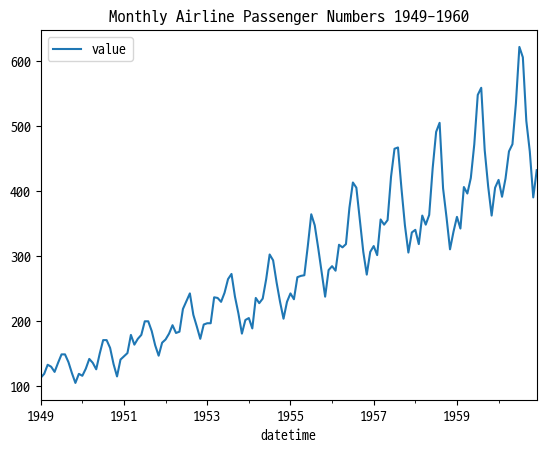

In [30]:
df.plot(x='datetime', y='value')
plt.title(data.title)
plt.show()

#### 2. scikit-learn 
* 머신러닝을 위한 패키지.

1. 데이터셋
  - load계열  : 패키지안에 내장된 소량의 데이터
  - fetch계열 : 인터넷을 통해 다운해야할 대량의 데이터
  - make계열  : 확률분포를 사용하여 회귀분석용, 분류용...등의 가상의 데이터
  - 데이터셋의 형태
    * data(필수)   : 독립변수, ndarray
    * target(필수) : 종속변수, ndarray
    * feature_names(옵션): 독립변수의 이름의 목록
    * target_names(옵션) : 종속변수의 이름의 목록
    * DESCR(옵션) : 데이터셋의 설명   
 
2. 데이터전처리(preprocessing)
3. 지도학습(Supervised Learning)
4. 비지도학습(Unsupervised Learning)
5. 모델평가 및 선택(Evaluation and Selection)

In [31]:
from sklearn.datasets import load_digits
import seaborn as sns

In [32]:
# load_digits는 손으로 쓴 숫자의 이미지 데이터(8x8=64)
# MNIST handwritten digit images
digits = load_digits()
print(type(digits), digits)

<class 'sklearn.utils._bunch.Bunch'> {'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pi

In [34]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [37]:
print(type(digits.data[0]), len(digits.data[0]), digits.data[0])
print(f'{digits.data[0]}의 이미지의 숫자는 = {digits.target[0]}')

<class 'numpy.ndarray'> 64 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]의 이미지의 숫자는 = 0


In [40]:
print(f'{digits.data[0]}의 이미지의 숫자는 = {digits.target[0]}')

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]의 이미지의 숫자는 = 0


In [42]:
print(digits.images[0], digits.images[0].shape)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] (8, 8)


숫자이미지의 인덱스를 입력하세요!! =>  100


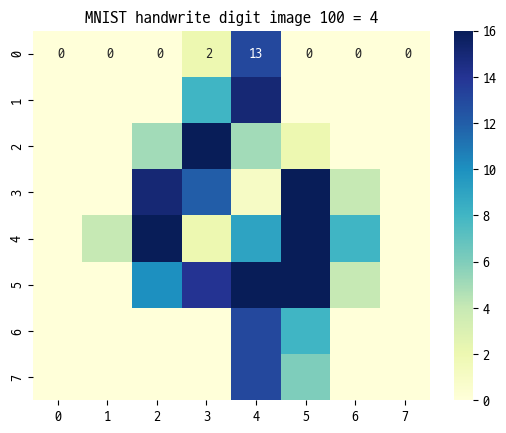

In [59]:
# digits이미지의 시각화
idx = int(input('숫자이미지의 인덱스를 입력하세요!! => '))
sns.heatmap(digits.images[idx], annot=True, fmt="2.0f", cbar=True
           , xticklabels=True, yticklabels=True, cmap='YlGnBu')
plt.title(f"MNIST handwrite digit image {idx} = {digits.target[idx]}")
plt.show()

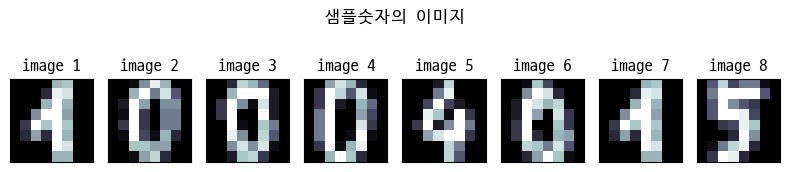

In [64]:
# 샘플이미지 선택
samples = [200,10,20,30,100,101,200,33] # 샘플이미지의 index
d = []
for i in range(len(samples)):
    d.append(digits.images[samples[i]])

plt.figure(figsize=(8,2))

for i in range(len(samples)):
    plt.subplot(1,8,i+1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'image {i+1}')

plt.suptitle('샘플숫자의 이미지')
plt.tight_layout()
plt.show()

In [70]:
# 예측모델에 맞게 데이터형태의 변환해서 전달 
# reshape(), flatten()
print(digits.images[0].shape)

# flatten은 2차원 -> 1차원 변환
print(digits.images[0].flatten().shape) 

# reshape 1차원 -> 2차원 변환
print(digits.images[0].flatten().reshape((8,8)).shape) 

(8, 8)
(64,)
(8, 8)


In [74]:
# 벡터화(vector)된 이미지의 시각화
v = []
for i in range(len(samples)):
    v.append(d[i].reshape(64, 1))
print(d[0])
print(v[0])

[[ 0.  0.  0.  0. 11. 12.  0.  0.]
 [ 0.  0.  0.  3. 15. 14.  0.  0.]
 [ 0.  0.  0. 11. 16. 11.  0.  0.]
 [ 0.  0.  9. 16. 16. 10.  0.  0.]
 [ 0.  4. 16. 12. 16. 12.  0.  0.]
 [ 0.  3. 10.  3. 16. 11.  0.  0.]
 [ 0.  0.  0.  0. 16. 14.  0.  0.]
 [ 0.  0.  0.  0. 11. 11.  0.  0.]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [11.]
 [12.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 3.]
 [15.]
 [14.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [11.]
 [16.]
 [11.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 9.]
 [16.]
 [16.]
 [10.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 4.]
 [16.]
 [12.]
 [16.]
 [12.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 3.]
 [10.]
 [ 3.]
 [16.]
 [11.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [16.]
 [14.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [11.]
 [11.]
 [ 0.]
 [ 0.]]


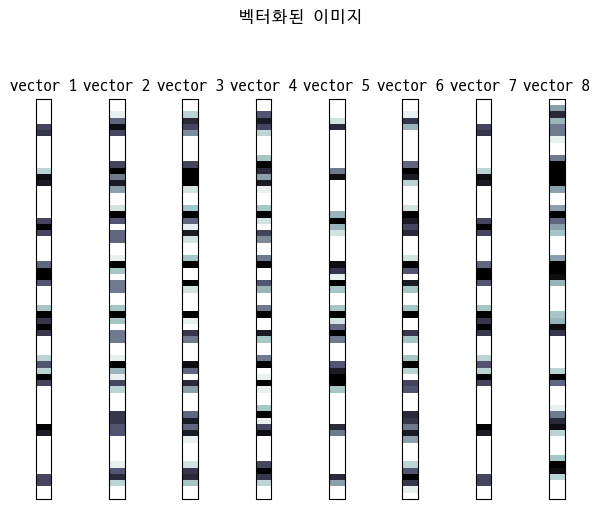

In [79]:
for i in range(len(samples)):
    plt.subplot(1,8,i+1)
    plt.imshow(v[i], interpolation='nearest'
               , cmap=plt.cm.bone_r, aspect=0.4)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(f'vector {i+1}')

plt.suptitle('벡터화된 이미지', y=1.05)
plt.tight_layout()
plt.show()